In [26]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker


In [17]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241026_135608.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241026_135608.braidz using pyarrow


In [18]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    86167  1.729944e+09 -0.041785  0.100152 -0.008295   
 1             0    86168  1.729944e+09 -0.038545  0.098653 -0.012396   
 2             0    86169  1.729944e+09 -0.037554  0.098072 -0.012989   
 3             0    86170  1.729944e+09 -0.037365  0.097954 -0.013230   
 4             0    86171  1.729944e+09 -0.037543  0.098057 -0.013267   
 ...         ...      ...           ...       ...       ...       ...   
 3746263   67211  8634379  1.730029e+09 -0.045684 -0.228301  0.000700   
 3746264   67211  8634380  1.730029e+09 -0.045672 -0.228282  0.000737   
 3746265   67211  8634381  1.730029e+09 -0.045711 -0.228296  0.000742   
 3746266   67211  8634382  1.730029e+09 -0.045710 -0.228318  0.000746   
 3746267   67211  8634383  1.730029e+09 -0.045701 -0.228319  0.000776   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.072317  0.025608  0.147736  3.662435e-07

In [19]:
data = extract_stimulus_centered_data(df, csvs["opto"])

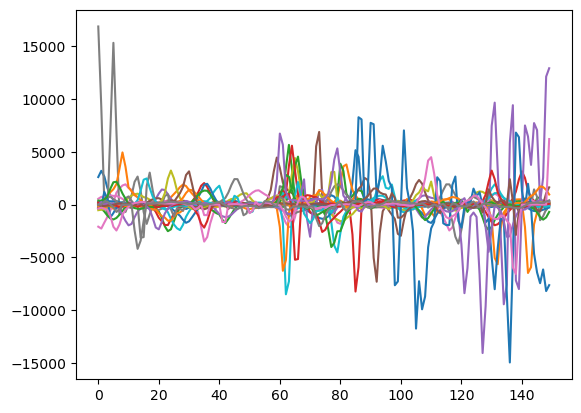

In [20]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

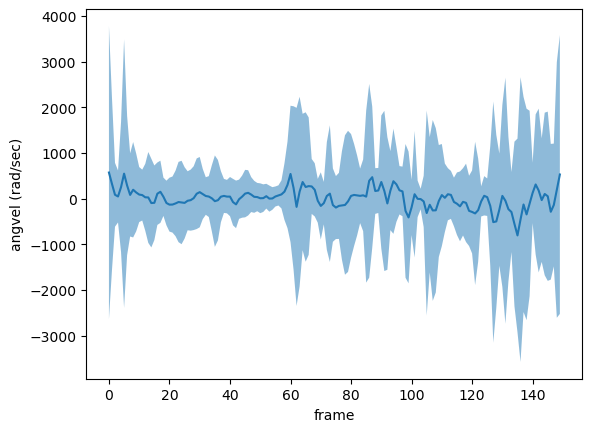

In [21]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

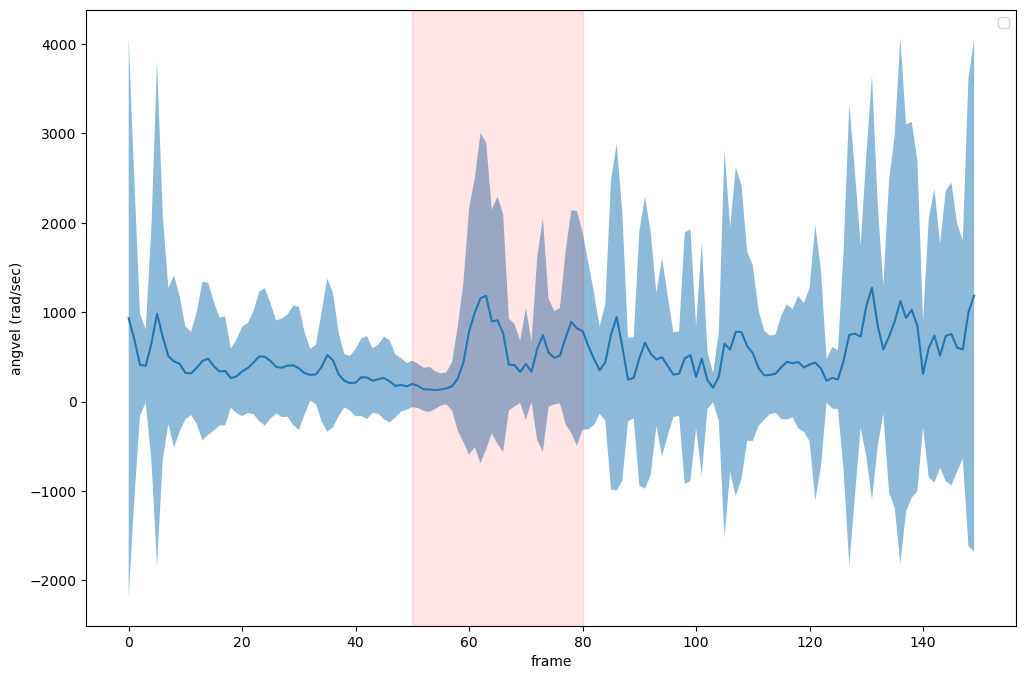

In [22]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
ax.legend()
plt.show()

<Axes: >

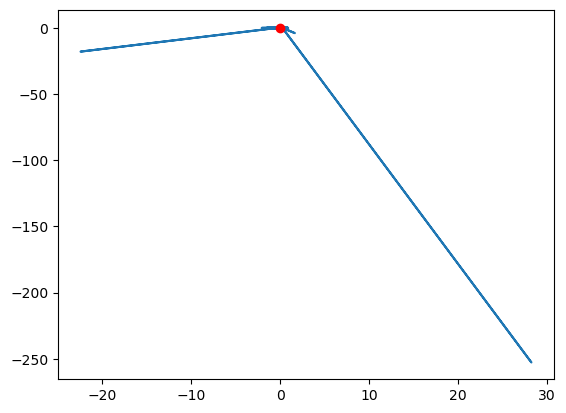

In [23]:
plot_trajectory(df)

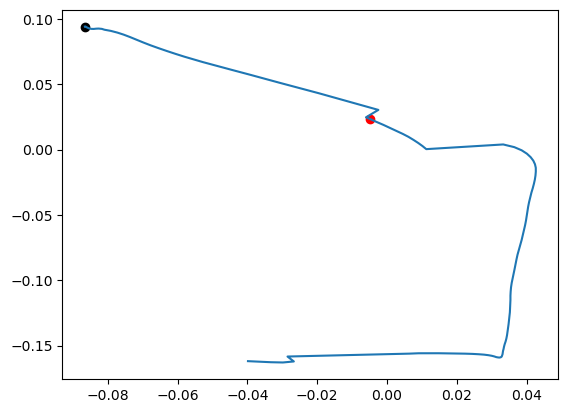

In [24]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

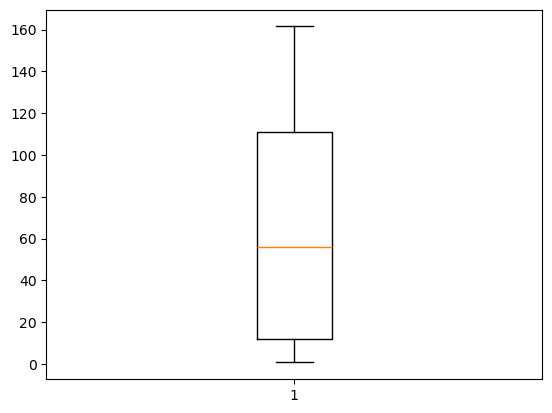

In [28]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()
